In [20]:
# WPV Data EDA Notebook - For Lily (Final Version)

# ===== 1. Import Libraries =====
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Set plot style
sns.set(style="whitegrid")

In [22]:
# ===== 2. Load Cleaned Data =====
df = pd.read_csv("../../cleaned_data/lily/merged_wpv_cleaned.csv")

In [23]:
# ===== 3. Dataset Overview =====
print("\n✅ Dataset Shape:", df.shape)
print("\n✅ Columns:", df.columns.tolist())
print("\n✅ Sample Rows:\n", df.head())


✅ Dataset Shape: (551, 15)

✅ Columns: ['event_time', 'victim_profession', 'victim_primary_job', 'department', 'perpetrator_type', 'violence_type', 'severity', 'emotional_impact', 'physical_injury_level', 'assault_desc', 'response_action', 'contributing_factors', 'osha_recordable', 'days_missed', 'source']

✅ Sample Rows:
             event_time                                  victim_profession  \
0  2024-01-09 00:00:00                   Nurse (RN, LPN), Nurse (RN, LPN)   
1  2024-02-06 00:00:00  Nurse (RN, LPN), Security, Allied Health/Techn...   
2  2024-02-09 00:00:00  Nurse (RN, LPN), Physician/Advanced Practice P...   
3  2024-02-08 00:00:00  Nurse (RN, LPN), Physician/Advanced Practice P...   
4  2024-02-09 00:00:00                                    Nurse (RN, LPN)   

  victim_primary_job              department perpetrator_type  \
0          Nurse (RN          Nurses Station          Patient   
1          Nurse (RN            Patient Room          Patient   
2          Nurse

In [24]:
# ===== 4. Missing Values Check =====
print("\n📌 Missing Values per Column:\n", df.isnull().sum())


📌 Missing Values per Column:
 event_time               306
victim_profession        296
victim_primary_job       296
department               449
perpetrator_type         303
violence_type            303
severity                 441
emotional_impact         302
physical_injury_level    373
assault_desc             291
response_action          296
contributing_factors     289
osha_recordable          551
days_missed              551
source                     0
dtype: int64


/var/folders/tg/pw8z521d7yj4pk7__6gm37c00000gn/T/ipykernel_6597/272453552.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=3.0)


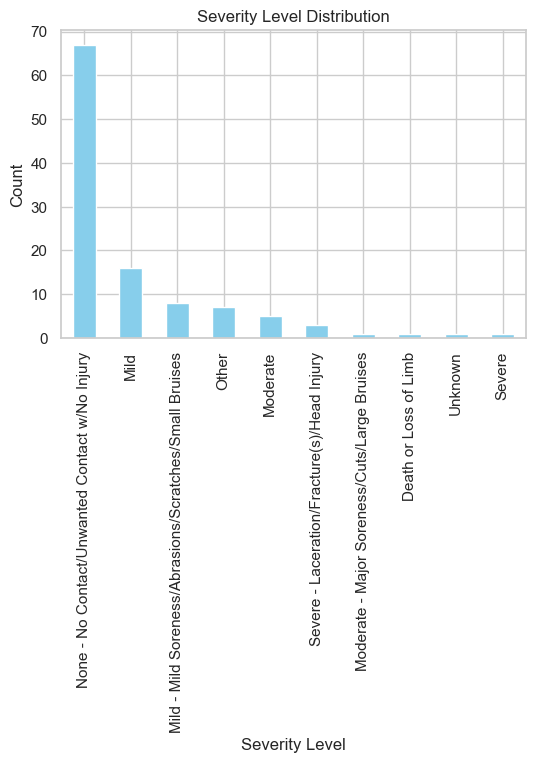

In [25]:
# ===== 5. Severity Level Distribution =====
plt.figure(figsize=(6,4))
df['severity'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Severity Level Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.tight_layout(pad=3.0)
plt.show()

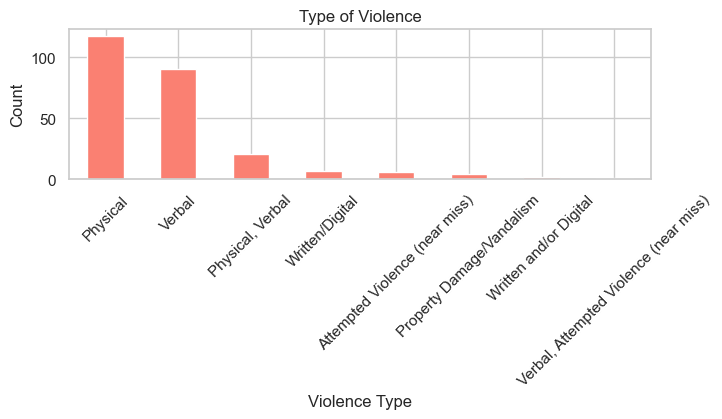

In [26]:
# ===== 6. Violence Type Distribution =====
plt.figure(figsize=(8,5))
df['violence_type'].value_counts().plot(kind='bar', color='salmon')
plt.title("Type of Violence")
plt.xlabel("Violence Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.show()

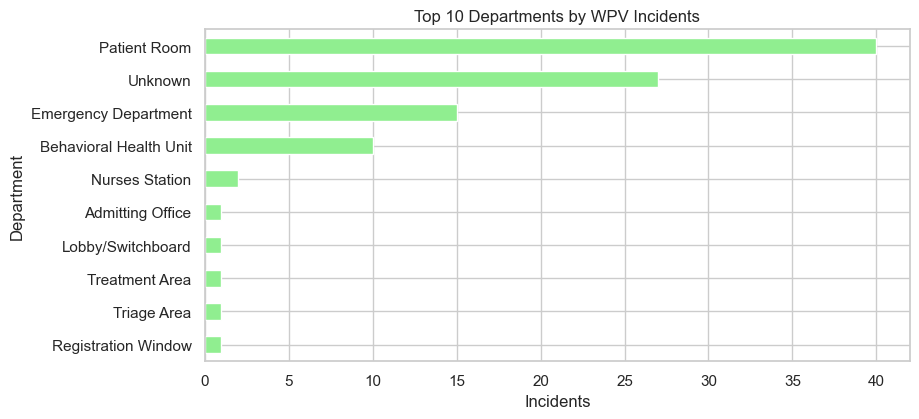

In [27]:
# ===== 7. Top 10 Departments Affected =====
plt.figure(figsize=(10,5))
df['department'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title("Top 10 Departments by WPV Incidents")
plt.xlabel("Incidents")
plt.ylabel("Department")
plt.gca().invert_yaxis()
plt.tight_layout(pad=3.0)
plt.show()

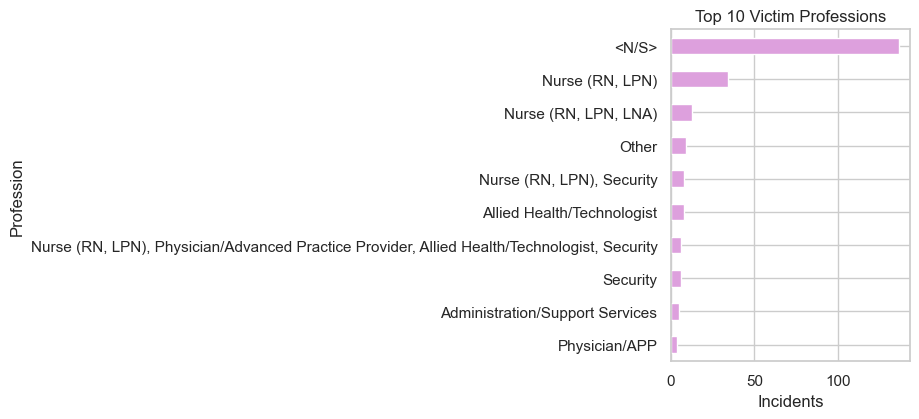

In [28]:
# ===== 8. Top 10 Professions Affected =====
plt.figure(figsize=(10,5))
df['victim_profession'].value_counts().head(10).plot(kind='barh', color='plum')
plt.title("Top 10 Victim Professions")
plt.xlabel("Incidents")
plt.ylabel("Profession")
plt.gca().invert_yaxis()
plt.tight_layout(pad=3.0)
plt.show()

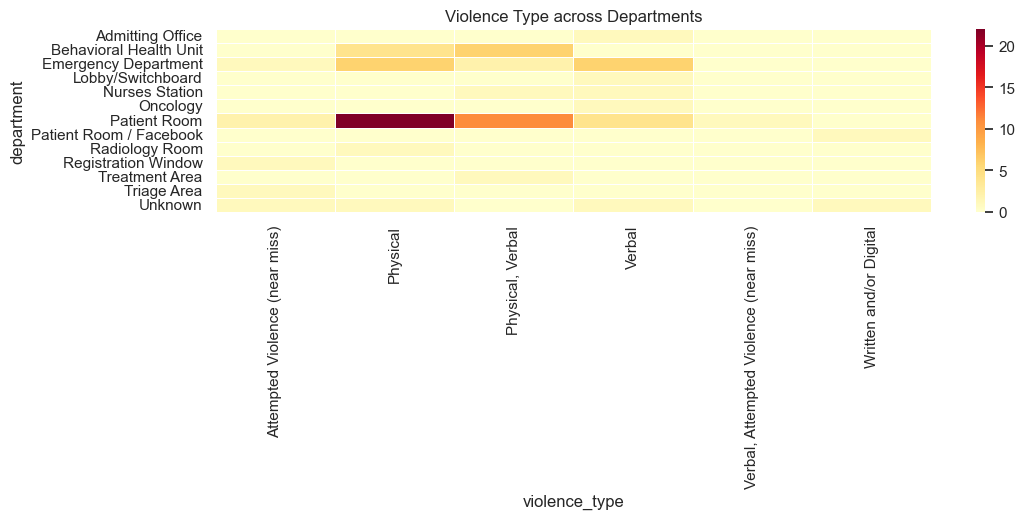

In [29]:
# ===== 9. Violence Type vs Department Heatmap =====
violence_dept_ct = pd.crosstab(df['department'], df['violence_type'])
plt.figure(figsize=(12,6))
sns.heatmap(violence_dept_ct, cmap="YlOrRd", linewidths=0.5)
plt.title("Violence Type across Departments")
plt.tight_layout(pad=3.0)
plt.show()

/var/folders/tg/pw8z521d7yj4pk7__6gm37c00000gn/T/ipykernel_6597/4193271266.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=3.0)


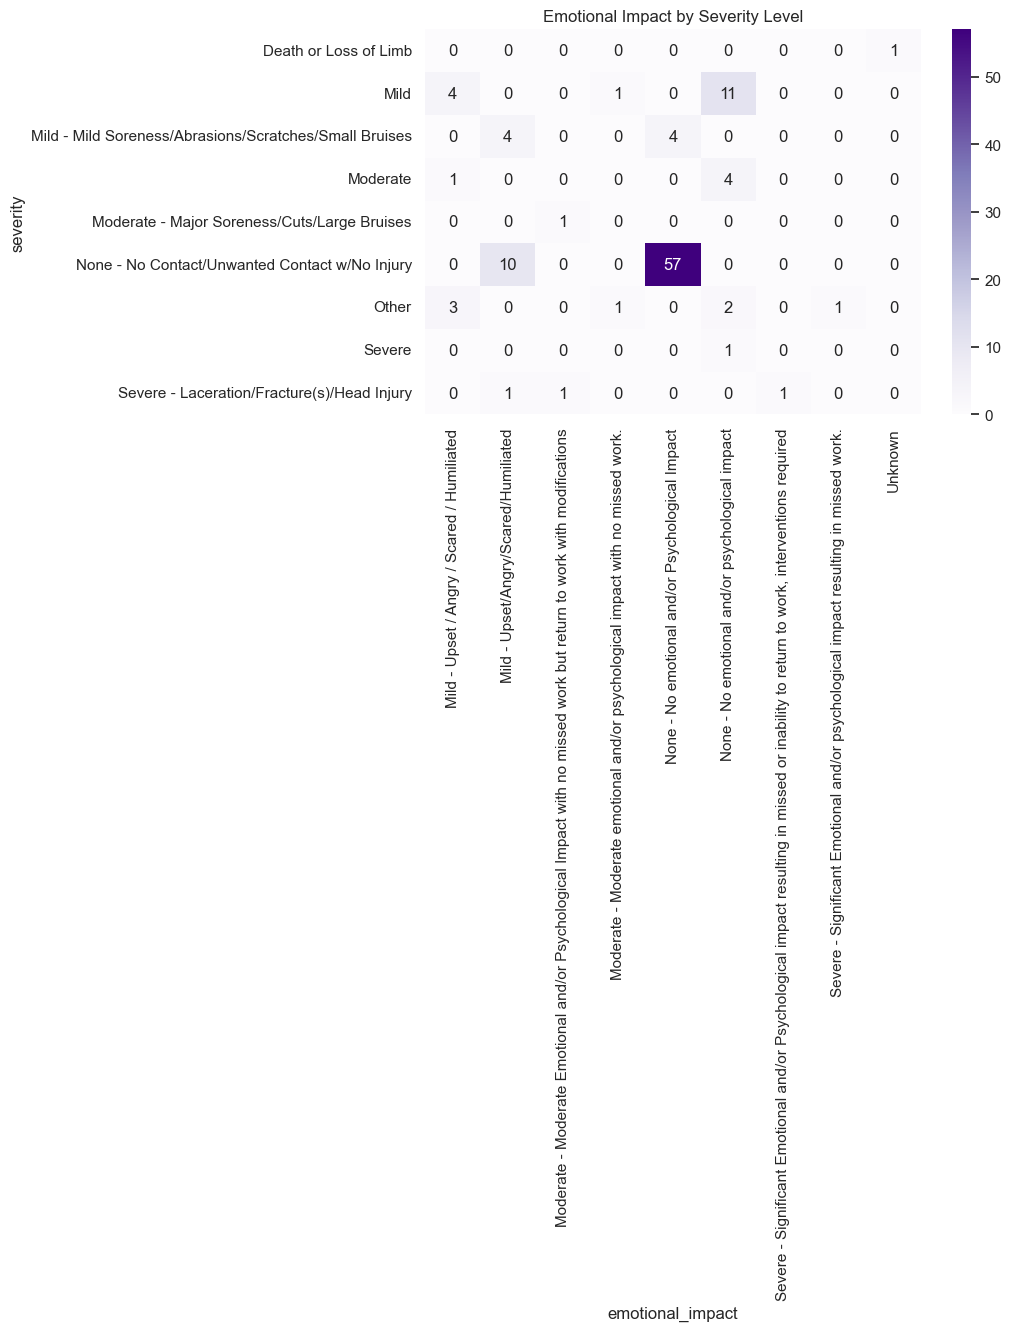

In [30]:
emotional_severity_ct = pd.crosstab(df['severity'], df['emotional_impact'])
plt.figure(figsize=(8,5))
sns.heatmap(emotional_severity_ct, annot=True, fmt="d", cmap="Purples")
plt.title("Emotional Impact by Severity Level")
plt.tight_layout(pad=3.0)
plt.show()

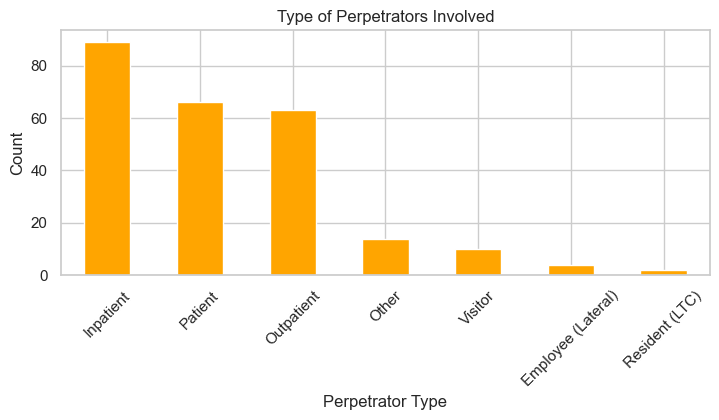

In [31]:
plt.figure(figsize=(8,5))
df['perpetrator_type'].value_counts().plot(kind='bar', color='orange')
plt.title("Type of Perpetrators Involved")
plt.xlabel("Perpetrator Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.show()


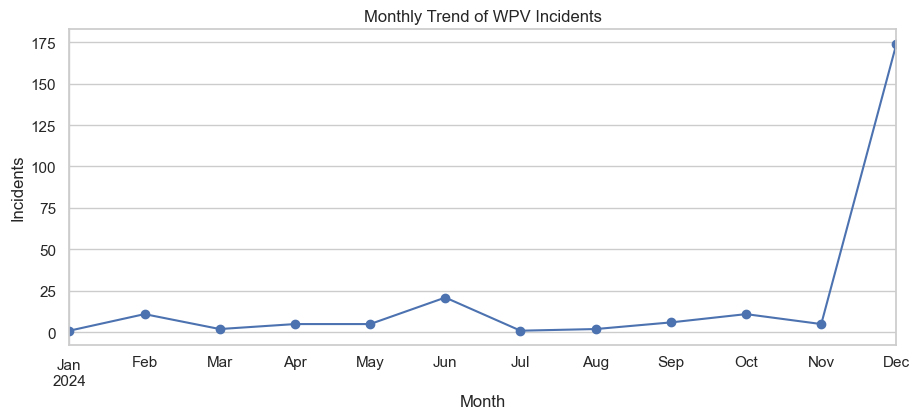

In [32]:
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')
df['month'] = df['event_time'].dt.to_period('M')
monthly_counts = df['month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
monthly_counts.plot(kind='line', marker='o')
plt.title("Monthly Trend of WPV Incidents")
plt.xlabel("Month")
plt.ylabel("Incidents")
plt.tight_layout(pad=3.0)
plt.show()
